# Exercise 6
***

## 1.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sc_stats
import scipy.integrate as sc_integrate

plt.rcParams['axes.facecolor'] = 'black'

n = 3000
std1 = 0.3
w = np.random.normal(0, std1, n)

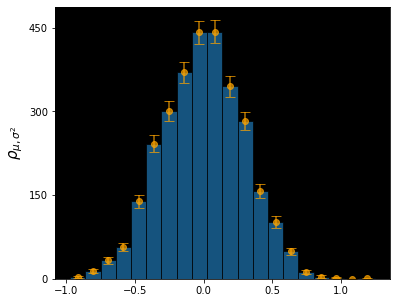

In [2]:
fig, ax = plt.subplots(1,1 , figsize=(6,5))
a,b,c = ax.hist(w, bins=20, alpha=0.7, edgecolor='black')
yerr = np.sqrt(a)
plt.errorbar(b[:20]+1/2*(abs(b[0]-b[1])), a, yerr ,fmt='o', alpha = 0.7, color = 'orange', capsize=5)
plt.ylabel(r'$\rho_{ \mu ,\sigma ^2}$', fontsize=15)
plt.yticks(np.arange(0, np.max(a+0.05*n), 0.05*n))

plt.show()

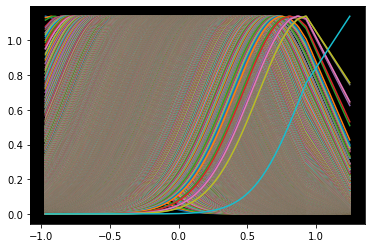

In [3]:
std = 0.35
w = np.sort(w)
gau = []
gau = np.array([sc_stats.norm(loc=x, scale=std).pdf(w) for x in w])

for x in gau:
    plt.plot(w, x)

([<matplotlib.axis.YTick at 0x7fcfc6857640>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

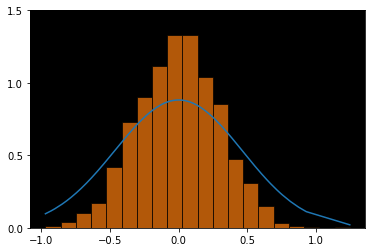

In [4]:
gau_sum = np.sum(gau, axis=0)
normalize = 1/sc_integrate.trapz(gau_sum, w)
gau_sum = gau_sum * normalize
plt.plot(w, gau_sum)
plt.hist(w, bins=20, alpha=0.7, density=True, edgecolor='black') 
plt.yticks(np.arange(0, 2, 0.5))

In [5]:
print(sc_integrate.trapz(gau_sum, w))
print(np.sum(a)*abs(abs(b[0]-b[1]))/(0.1*n))

1.0
1.108098910959534


## 2.

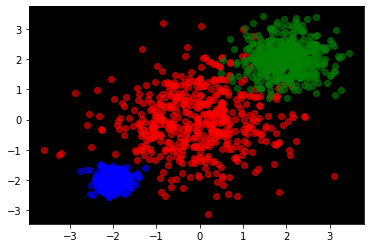

In [6]:
def d2_data(mean, std, size):
    return np.array([np.random.normal(mean, std, size), np.random.normal(mean, std, size)])

x1 = d2_data(0, 1, 500)
x2 = d2_data(2, 0.5, 500)
x3 = d2_data(-2, 0.2, 500)

plt.scatter(x1[0], x1[1], color='r', alpha=0.6)
plt.scatter(x2[0], x2[1], color='g', alpha=0.6)
plt.scatter(x3[0], x3[1], color='b', alpha=0.6)

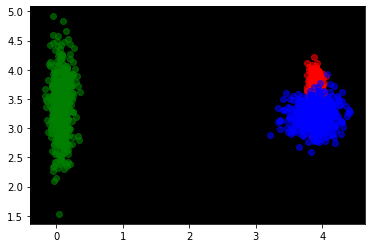

In [7]:
# mean and std random in intervall from 0 to mean/std

def d2_data(mean, std, size):
    return np.array([np.random.normal(np.random.uniform(0, mean), np.random.uniform(0, std), size), np.random.normal(np.random.uniform(0, mean), np.random.uniform(0, std), size)])

x1 = d2_data(5, 0.7, 500)
x2 = d2_data(5, 0.7, 500)
x3 = d2_data(5, 0.7, 500)

plt.scatter(x1[0], x1[1], color='r', alpha=0.6)
plt.scatter(x2[0], x2[1], color='g', alpha=0.6)
plt.scatter(x3[0], x3[1], color='b', alpha=0.6)

## 3.


In [8]:
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy -P ~/data/

--2021-12-01 21:16:43--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Resolving www.dropbox.com... 162.125.69.18
Connecting to www.dropbox.com|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2021-12-01 21:16:49--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc32af5fce39971f9ea6ddc77e7c.dl.dropboxusercontent.com/cd/0/inline/BbBXedtIXUHO--pPvim0ne-b14kxYlRIzMbWw03EQgY089ihLxhpTyboUbCGPFujoFocrAlCG-0dJC_wyqA-DxHnOeOMec9mQtPRqjvvpEzeFDR1oCTfRemY72wuvLHuRUkTenjRNThNX87-8MntGih9/file# [following]
--2021-12-01 21:16:50--  https://uc32af5fce39971f9ea6ddc77e7c.dl.dropboxusercontent.com/cd/0/inline/BbBXedtIXUHO--pPvim0ne-b14kxYlRIzMbWw03EQgY089ihLxhpTyboUbCGPFujoFocrAlCG-0dJC_wyqA-DxHnOeOMec9mQtPRqjvvpEzeFDR1oCTfRemY72wuvLHuRUkTenjRN

In [88]:
data1 = np.load('/Users/max/data/residuals_261.npy', allow_pickle=True)

In [89]:
import pandas as pd

data1 = pd.DataFrame(data1.item())

In [90]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11131 entries, 0 to 11130
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   residuals  11131 non-null  float64
 1   distances  11131 non-null  float64
dtypes: float64(2)
memory usage: 174.0 KB


In [106]:
mask = abs(data1['residuals']) < 2
data1 = data1[mask]
np.mean(data['residuals'])

-0.12187773131943122

In [107]:
import scipy as sc
sc.stats.linregress(data1['distances'][mask],data1['residuals'][mask])

LinregressResult(slope=0.003259770122030582, intercept=-0.15432816763069473, rvalue=0.04340351052255907, pvalue=8.717037183576494e-06, stderr=0.0007327014008445791, intercept_stderr=0.008458951961471837)

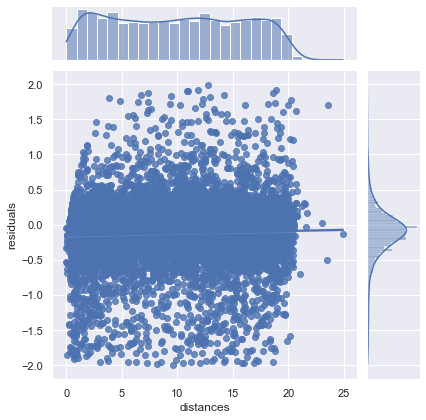

In [108]:
import seaborn as sns
sns.set(style="darkgrid")
sns.jointplot(y=data1['residuals'][mask], x=data1['distances'][mask], kind='reg')

In [109]:
x1 = np.arange(1, 23 , 2)
print(x1)

[ 1  3  5  7  9 11 13 15 17 19 21]


In [110]:
y1 = np.array([[data1['residuals'][i] for i in data1.index if s - 1 <= data1['distances'][i] <= 1 + s] for s in x1 ])

/var/folders/0c/s31t6sbs7x92vc54xc4x32n40000gn/T/ipykernel_79260/1434824585.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y1 = np.array([[data1['residuals'][i] for i in data1.index if s - 1 <= data1['distances'][i] <= 1 + s] for s in x1 ])


In [111]:
yerr = [np.std(i) for i in y1]

In [114]:
for i in range(len(y1)):
     y1[i] = np.mean(y1[i])
    
print(np.mean(data1))
print(np.mean(y1))

residuals   -0.121878
distances    9.954824
dtype: float64
-0.10731333295488686


/Users/max/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


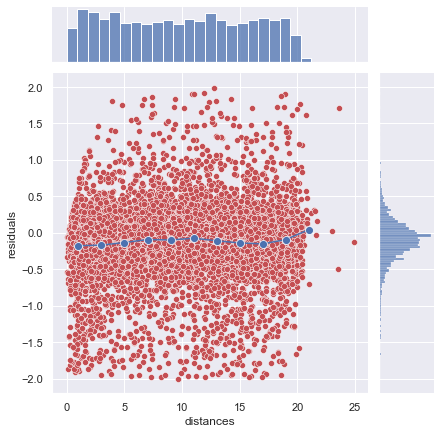

In [120]:
g = sns.JointGrid()
sns.scatterplot(data1['distances'], data1['residuals'], color='r', ax=g.ax_joint, )
sns.lineplot(x=x1, y=y1, marker='o', markersize=8, ax=g.ax_joint)
sns.histplot(x=data1['distances'], ax=g.ax_marg_x)
sns.histplot(y=data1['residuals'], ax=g.ax_marg_y)
plt.ylabel(r'$\overline{r}$')
plt.xlabel(r'distance interval $x \pm 1$')
plt.xticks(x1)
plt.show()